# Theis (1935) interpretation  
 
This notebook demonstrates how to use **OpenHyTest** for the interpretation of a pumping test with the Theis (1935) solution.

Copyright 1998-2020 - Philippe Renard, Nathan Dutler & Bernard Brixel

First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management.


In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import openhytest as ht
import matplotlib.pyplot as plt
import pandas as pd

 ## Load the data
 The data set for this example has been typed from: 
 Table 5.1, page 172 in the following book:
 C.W. Fetter, 2001, Applied Hydrogeology, Fourth Edition.
 Prentice Hall, Upper Saddle River, 598 pp.

For this example, the data is stored in the ascii file `ths_ds1.txt` that contains two columns as we can see if you edit the data file with your prefered text editor. The first column is the time in seconds. The second column contains the drawdown in meters.

It is also possible to import the data from complex files but we will not discuss this point here (for more information consult the pandas website https://pandas.pydata.org/ or check the jupiter demostration of multi_arrays.)

Let us now load the data in the python workspace with the pd.read_csv function from pandas library. This allows to create a pandas timeseries with two entries called: t and s containing the data. We will use them in the next steps, but we can first plot them to check graphicaly that they have been correctly loaded.

In [2]:
name = ["t","s"]
dtypes = {'t': 'float', 's': 'float'}
data = pd.read_csv('../data/ths_ds1.txt', sep=" ", header = None, names=name, dtype=dtypes)

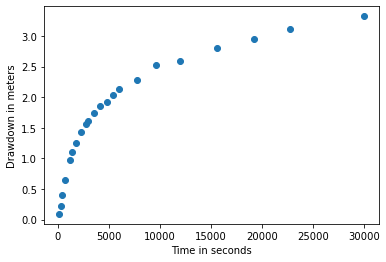

In [3]:
plt.plot(data.t,data.s,'o')
plt.xlabel('Time in seconds')
plt.ylabel('Drawdown in meters')
plt.show()

 ## Diagnostic plot 
 
 In order to display the diagnostic plot of the data, we use the function diagnostic(t,s) provided by the prepreocessing tool.

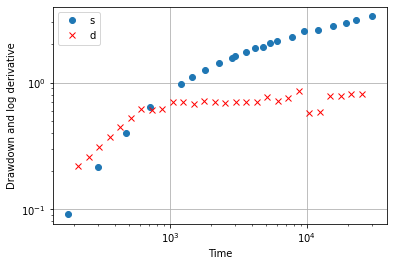

In [4]:
test = ht.preprocessing(data)
test.diagnostic()

The plot shows a typical 2D infinite acting radial flow.
The derivative stabilizes at late time and the derivative is larger than
the drawdown at early time. 

We will therefore interpret the data with the Theis (1935) solution
that allows to model such behaviour.
 
Openhytest syntax : 
As OpenHyTest is programmed in python it allow to use object oriented attributes. Therfore, we initialize first the Theis model
theis_model=ht.Theis(Q=q, r=d, df=data).

The typecurve show the dimensionless model inclusive derivative.

Model parameter guess :
In order to determine the value of the Theis model parameter, we first 
use the guess_params() to estimate roughly an initial guess p0.

For the Theis (1935) model, the parameter p0 vector contains two values: the
first is the slope a of the late time straight line, while the
second parameter is the time t0 at which this straight line
intercept the axis s=0. For this exercise, we print out this parameter. 
It can also be accessed via the initialized object (here: theis_model.p).

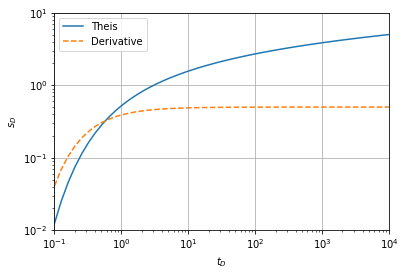

In [5]:
q = 1.3888e-2 #pumping rate in m3/s
d = 250 #radial distance in m
theis_model=ht.Theis(Q=q, r=d, df=data)
theis_model.plot_typecurve()

In [6]:
p0 = theis_model.guess_params()
print(p0)

[  1.70038569 341.82452507]


To check visually the quality of this first guess, we then plot the model
corresponding to these parameters and the data with the openhytest function
trial. The function trial can be applied for any model and therefore it
requires that the name of model ...  is provided together with the values of
the parameter p0 and the data. ... is the name of the function that
computes the drawdown from p0 and t.

We see in the resulting figure both in log-log and semi-log scale
that the fit is already pretty good for this example.

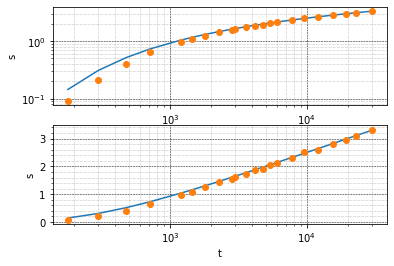

T =  0.0014965736386863039 m2/s
S =  1.838230592225941e-05 -
Ri =  3125.64516579519 m


In [7]:
theis_model.trial()

Model parameter identification:

In the previous steps, we obtained a rough initial guess that is used here
as an initial value in an iterative non linear optimization technique to
fit the model to the complete data set. This is done with the hypy Theis model fit.

We see visually that the fit has been improved. The values of the
parameters have slightly changed. 

`ftol` termination condition is satisfied.
Function evaluations 13, initial cost 3.2141e-02, final cost 8.4643e-03, first-order optimality 2.18e-10.


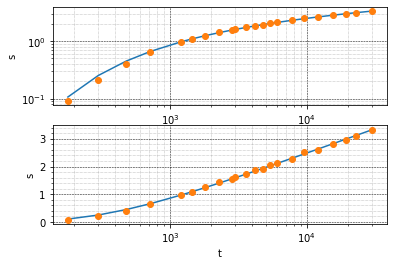

T =  0.0014251235274012491 m2/s
S =  2.1104574206023773e-05 -
Ri =  2846.613998659661 m
[  1.78563637 412.12162662]


In [8]:
p = theis_model.fit(fitmethod='lm')
theis_model.trial()
print(p)

We can use the command theis_model.rpt() to calculate and report the result in one step. This command has more attributes (i.e. option_fit, ttle, author, filetype and reptext),  which allow to specify the output. The option_fit allow to specify, which algorithm in the fit function is used, either Levenberg-Marquard or Trust Region Reflective algorithm (more in the scipy.optimize library, command least_squares). 

`gtol` termination condition is satisfied.
Function evaluations 1, initial cost 8.4643e-03, final cost 8.4643e-03, first-order optimality 2.18e-10.


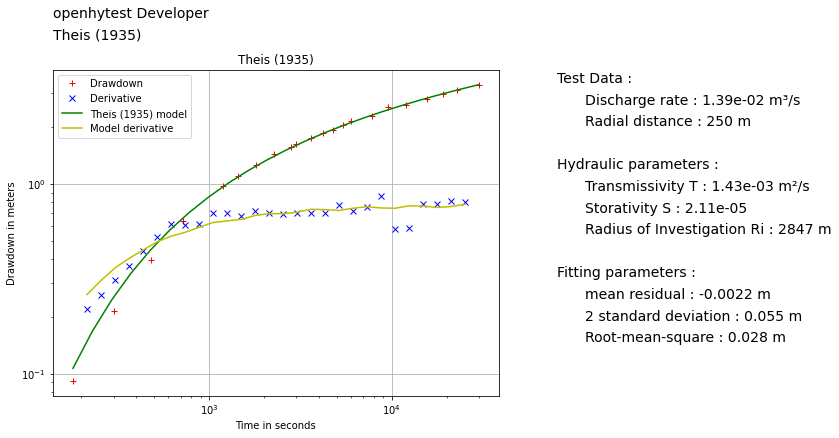

In [9]:
theis_model.rpt(fitmethod='trf', ttle='Theis (1935)', author='openhytest Developer', filetype='pdf', reptext='Report_Theis_example')

The estimated transmissivity is 1.4e-3 m2/s and the storativity is 2.1e-5. These numbers compare well with the values estimated by Fetter (2001) which are the following:

Type curve matching (p.173):
T = 1.5 e-3 m2/s 
S = 2.4 e-5 

Straight line analysis (p. 174-175):
T = 1.5 e-3 m2/s 
S = 1.7 e-5

The following attributes can be accessed and be used for further plotting or calculations. All attributes and their description can be found in the   documentation.

In [10]:
print(theis_model.Q)
print(theis_model.r)
print(theis_model.p)
print(theis_model.df)
print(theis_model.der)
print(theis_model.tc)
print(theis_model.sc)
print(theis_model.derc)
print(theis_model.mr)
print(theis_model.sr)
print(theis_model.rms) 
print(theis_model.ttle) 
print(theis_model.model_label) 
print(theis_model.xsize )
print(theis_model.ysize )
print(theis_model.Transmissivity )
print(theis_model.Storativity )
print(theis_model.RadInfluence )
theis_model.detailled_p 

0.013888
250
[  1.78563637 412.12162662]
          t        s
0     180.0  0.09144
1     300.0  0.21336
2     480.0  0.39624
3     720.0  0.64008
4    1200.0  0.97536
5    1440.0  1.09728
6    1800.0  1.24968
7    2280.0  1.43256
8    2820.0  1.55448
9    3000.0  1.61544
10   3600.0  1.73736
11   4200.0  1.85928
12   4800.0  1.92024
13   5400.0  2.04216
14   6000.0  2.13360
15   7800.0  2.28600
16   9600.0  2.52984
17  12000.0  2.59080
18  15600.0  2.80416
19  19200.0  2.95656
20  22800.0  3.10896
21  30000.0  3.32232
               t         s
0     214.727654  0.218163
1     256.155363  0.260254
2     305.575779  0.310465
3     364.530945  0.370363
4     434.860415  0.441818
5     518.758648  0.527059
6     618.843486  0.612418
7     738.237833  0.606217
8     880.667100  0.615146
9    1050.575446  0.705217
10   1253.264449  0.703775
11   1495.058528  0.677487
12   1783.502279  0.715913
13   2127.595891  0.699633
14   2538.075968  0.695271
15   3027.750546  0.701939
16   3611.898731 

 active_mask: array([0., 0.])
        cost: 0.00846433662844203
         fun: array([-0.0154788 , -0.03956742, -0.05405974, -0.02179972,  0.00544752,
        0.00887276,  0.01148256,  0.03091505,  0.00242802,  0.01908246,
        0.00926043,  0.01856616, -0.01880933,  0.01584093,  0.02883856,
       -0.01542173,  0.07166164, -0.03671757, -0.02338935, -0.02986463,
       -0.00926214, -0.00684082])
        grad: array([-5.98910921e-11,  2.17760272e-10])
         jac: array([[-5.98771430e-02,  5.18721694e-04],
       [-1.41645538e-01,  8.68523189e-04],
       [-2.52178860e-01,  1.16063419e-03],
       [-3.70668817e-01,  1.36347616e-03],
       [-5.43174687e-01,  1.55099108e-03],
       [-6.09534650e-01,  1.60176846e-03],
       [-6.93420823e-01,  1.65420823e-03],
       [-7.84955424e-01,  1.69969735e-03],
       [-8.69187035e-01,  1.73313208e-03],
       [-8.93999230e-01,  1.74170612e-03],
       [-9.67777990e-01,  1.76429439e-03],
       [-1.03084473e+00,  1.78060800e-03],
       [-1.085

## Summary
The shortest way to produce results with loaded data is done in 3 lines of code.

`gtol` termination condition is satisfied.
Function evaluations 5, initial cost 3.2141e-02, final cost 8.4643e-03, first-order optimality 2.15e-10.


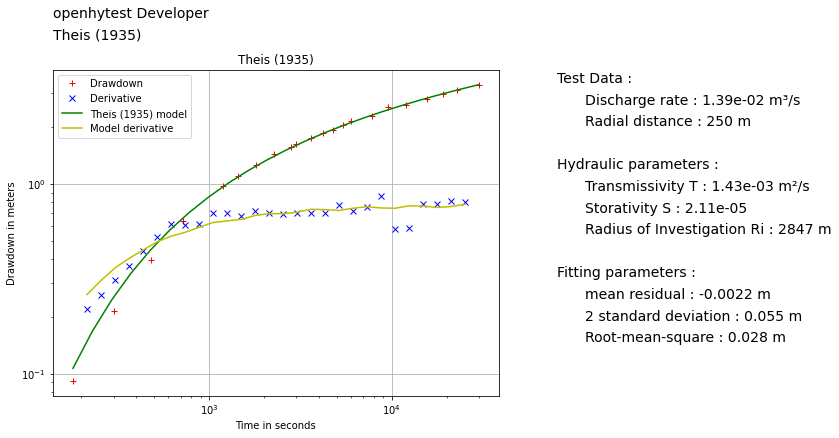

In [11]:
theis_model=ht.Theis(Q=1.3888e-2, r=250, df=data)
theis_model.guess_params()
theis_model.rpt(fitmethod='trf', ttle='Theis (1935)', author='openhytest Developer', filetype='svg', reptext='Report_Theis_example')